In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import warnings
import time

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
x = pd.read_csv("../datasets/x.csv")
x_train = pd.read_csv("../datasets/x_train.csv")
x_test = pd.read_csv("../datasets/x_test.csv")

In [4]:
x.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,80114.288249,143597.026531,20938.455295
1,1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,141.215034,312548.734113,20938.455295
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
3,3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,80114.288249,6006.811369,20938.455295
4,4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,80114.288249,6006.811369,20938.455295


In [5]:
x_train.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,103864,0,43,182,0,0,0,0,0,0,0,0,0,0,0,0,0,101,181,0.00,0.0,1.00,0.00,0.01,255,255,0.00,0.00,0.00,141.215034,130.256663,20938.455295
1,64100,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,73,73,0.00,0.0,1.00,0.00,0.00,255,73,0.64,0.29,0.00,141.215034,90075.670572,20938.455295
2,121047,0,311,1014,0,0,0,0,0,1,0,0,0,0,0,0,0,15,27,0.00,0.0,1.00,0.00,0.15,32,255,0.00,0.03,0.05,80114.288249,6006.811369,20938.455295
3,10100,0,3775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,0.05,0.0,0.05,0.75,0.00,255,1,0.07,0.45,0.00,80114.288249,312548.734113,20938.455295
4,69891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,20,1.00,0.0,0.09,0.07,0.00,255,20,0.08,0.00,0.00,80114.288249,0.104730,0.025365


In [6]:
x_test.head()

,Unnamed: 0,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,43367,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,106111,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,117860,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,8857,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,31875,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [7]:
y = pd.read_csv("../datasets/y.csv")
y_train = pd.read_csv("../datasets/y_train.csv")
y_test = pd.read_csv("../datasets/y_test.csv")

In [8]:
y.head()

,Unnamed: 0,attackhlc
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0


In [9]:
y_train.head()

,Unnamed: 0,attackhlc
0,103864,0
1,64100,1
2,121047,0
3,10100,0
4,69891,1


In [10]:
y_test.head()

,Unnamed: 0,attackhlc
0,43367,0
1,106111,0
2,117860,0
3,8857,0
4,31875,0


In [11]:
# dropping the "Unnamed: 0" column from x_train, x_val, x_test, y_train, y_val and y_test
x.drop(columns = ["Unnamed: 0"], inplace = True)
x_train.drop(columns = ["Unnamed: 0"], inplace = True)
x_test.drop(columns = ["Unnamed: 0"], inplace = True)
y.drop(columns = ["Unnamed: 0"], inplace = True)
y_train.drop(columns = ["Unnamed: 0"], inplace = True)
y_test.drop(columns = ["Unnamed: 0"], inplace = True)

In [12]:
x.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.00,0.00,0.00,150,25,0.03,0.17,0.00,80114.288249,143597.026531,20938.455295
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.08,0.15,0.00,255,1,0.60,0.88,0.00,141.215034,312548.734113,20938.455295
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,0.0,0.05,0.07,0.00,255,26,0.05,0.00,0.00,80114.288249,90075.670572,0.025365
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.2,0.0,1.00,0.00,0.00,30,255,0.00,0.03,0.04,80114.288249,6006.811369,20938.455295
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,30,32,0.0,0.0,1.00,0.00,0.09,255,255,0.00,0.00,0.00,80114.288249,6006.811369,20938.455295


In [13]:
x_train.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,43,182,0,0,0,0,0,0,0,0,0,0,0,0,0,101,181,0.00,0.0,1.00,0.00,0.01,255,255,0.00,0.00,0.00,141.215034,130.256663,20938.455295
1,0,28,0,0,3,0,0,0,0,0,0,0,0,0,0,0,73,73,0.00,0.0,1.00,0.00,0.00,255,73,0.64,0.29,0.00,141.215034,90075.670572,20938.455295
2,0,311,1014,0,0,0,0,0,1,0,0,0,0,0,0,0,15,27,0.00,0.0,1.00,0.00,0.15,32,255,0.00,0.03,0.05,80114.288249,6006.811369,20938.455295
3,0,3775,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,1,0.05,0.0,0.05,0.75,0.00,255,1,0.07,0.45,0.00,80114.288249,312548.734113,20938.455295
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,212,20,1.00,0.0,0.09,0.07,0.00,255,20,0.08,0.00,0.00,80114.288249,0.104730,0.025365


In [14]:
x_test.head()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numfilecreations,numshells,numaccessfiles,ishostlogin,count,srvcount,serrorrate,rerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,protocol_encoded,service_encoded,flag_encoded
0,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,0.0,0.00,212,206,0.01,0.01,0.00,141.215034,90075.670572,20938.455295
1,0,723,328,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.00,120,138,0.02,0.01,0.02,80114.288249,32667.764255,20938.455295
2,0,339,1497,0,0,0,0,0,1,0,0,0,0,0,0,0,13,13,0.0,0.0,1.0,0.0,0.00,51,247,0.00,0.02,0.13,80114.288249,6006.811369,20938.455295
3,0,293,807,0,0,0,0,0,1,0,0,0,0,0,0,0,5,5,0.0,0.0,1.0,0.0,0.00,227,255,0.00,0.00,0.01,80114.288249,6006.811369,20938.455295
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,13,19,0.0,0.0,1.0,0.0,0.16,255,254,0.01,0.00,0.00,141.215034,130.256663,20938.455295


In [15]:
y.head()

,attackhlc
0,0
1,0
2,1
3,0
4,0


In [16]:
y_train.head()

,attackhlc
0,0
1,1
2,0
3,0
4,1


In [17]:
y_test.head()

,attackhlc
0,0
1,0
2,0
3,0
4,0


In [18]:
# scaling only the training and testing datasets using StandardScaler for now
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# model building without hyperparameter tuning

In [20]:
# logistic regression OvR

In [21]:
# model training
log_reg_ovr = LogisticRegression(multi_class = "ovr", random_state = 96)
start_time = time.time()
log_reg_ovr.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_log_reg_ovr = end_time - start_time

In [22]:
# predicting using the training data
y_train_pred_log_reg_ovr = log_reg_ovr.predict(x_train_scaled)
y_train_pred_log_reg_ovr

array([0, 1, 0, ..., 1, 3, 1])

In [23]:
# predicting using the testing data
y_test_pred_log_reg_ovr = log_reg_ovr.predict(x_test_scaled)
y_test_pred_log_reg_ovr

array([0, 0, 0, ..., 0, 1, 1])

In [24]:
# accuracy score of prediction using the training data
train_accuracy_log_reg_ovr = accuracy_score(y_train, y_train_pred_log_reg_ovr)
train_accuracy_log_reg_ovr

0.9517204618141403

In [25]:
# accuracy score of prediction using the testing data
test_accuracy_log_reg_ovr = accuracy_score(y_test, y_test_pred_log_reg_ovr)
test_accuracy_log_reg_ovr

0.9507541677692511

In [26]:
# confusion matrix
cm_log_reg_ovr = confusion_matrix(y_test, y_test_pred_log_reg_ovr)
cm_log_reg_ovr

array([[19627,   210,    72,   347,     3],
       [  495, 13223,     1,     5,     0],
       [  208,     3,    88,     3,     0],
       [  423,    81,     0,  2987,     0],
       [    9,     0,     0,     1,     4]])

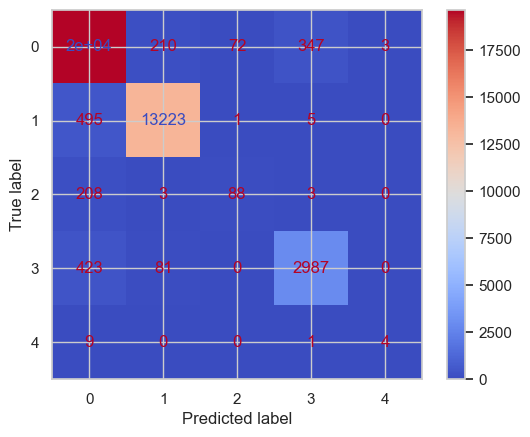

In [27]:
# visualizing the confusion matrix
disp_cm_log_reg_ovr = ConfusionMatrixDisplay(cm_log_reg_ovr)
disp_cm_log_reg_ovr.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_log_reg_ovr.png")
plt.show()

In [28]:
# precision score
precision_score_log_reg_ovr = precision_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
precision_score_log_reg_ovr

0.9491744612423747

In [29]:
# recall score
recall_score_log_reg_ovr = recall_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
recall_score_log_reg_ovr

0.9507541677692511

In [30]:
# f1 score
f1_score_log_reg_ovr = f1_score(y_test, y_test_pred_log_reg_ovr, average = "weighted")
f1_score_log_reg_ovr

0.9495007450652647

In [31]:
# classification report
classification_report_log_reg_ovr = classification_report(y_test, y_test_pred_log_reg_ovr)
print(classification_report_log_reg_ovr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     20259
           1       0.98      0.96      0.97     13724
           2       0.55      0.29      0.38       302
           3       0.89      0.86      0.87      3491
           4       0.57      0.29      0.38        14

    accuracy                           0.95     37790
   macro avg       0.79      0.67      0.71     37790
weighted avg       0.95      0.95      0.95     37790



In [32]:
# knn classifier

In [33]:
# model training
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = "manhattan")
start_time = time.time()
knn_classifier.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_knn_classifier = end_time - start_time

In [34]:
# predicting using the training data
y_train_pred_knn_classifier = knn_classifier.predict(x_train_scaled)
y_train_pred_knn_classifier

array([0, 1, 0, ..., 1, 3, 1])

In [35]:
# predicting using the testing data
y_test_pred_knn_classifier = knn_classifier.predict(x_test_scaled)
y_test_pred_knn_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [36]:
# accuracy score of prediction using the training data
train_accuracy_knn_classifier = accuracy_score(y_train, y_train_pred_knn_classifier)
train_accuracy_knn_classifier

0.9973461564633566

In [37]:
# accuracy score of prediction using the testing data
test_accuracy_knn_classifier = accuracy_score(y_test, y_test_pred_knn_classifier)
test_accuracy_knn_classifier

0.9953426832495369

In [38]:
# confusion matrix
cm_knn_classifier = confusion_matrix(y_test, y_test_pred_knn_classifier)
cm_knn_classifier

array([[20183,    17,    23,    34,     2],
       [   22, 13702,     0,     0,     0],
       [   27,     0,   275,     0,     0],
       [   40,     1,     0,  3450,     0],
       [   10,     0,     0,     0,     4]])

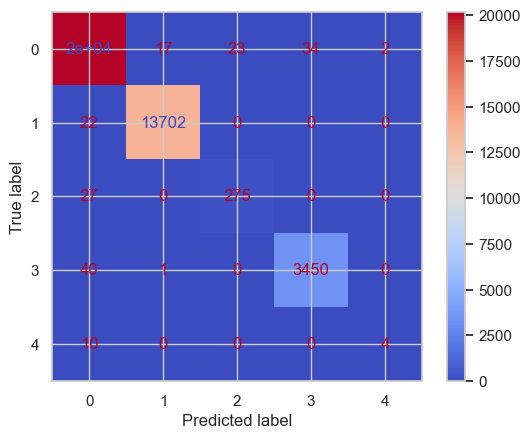

In [39]:
# visualizing the confusion matrix
disp_cm_knn_classifier = ConfusionMatrixDisplay(cm_knn_classifier)
disp_cm_knn_classifier.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_knn_classifier.png")
plt.show()

In [40]:
# precision score
precision_score_knn_classifier = precision_score(y_test, y_test_pred_knn_classifier, average = "weighted")
precision_score_knn_classifier

0.9952649726233868

In [41]:
# recall score
recall_score_knn_classifier = recall_score(y_test, y_test_pred_knn_classifier, average = "weighted")
recall_score_knn_classifier

0.9953426832495369

In [42]:
# f1 score
f1_score_knn_classifier = f1_score(y_test, y_test_pred_knn_classifier, average = "weighted")
f1_score_knn_classifier

0.9952750046309032

In [43]:
# classification report
classification_report_knn_classifier = classification_report(y_test, y_test_pred_knn_classifier)
print(classification_report_knn_classifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20259
           1       1.00      1.00      1.00     13724
           2       0.92      0.91      0.92       302
           3       0.99      0.99      0.99      3491
           4       0.67      0.29      0.40        14

    accuracy                           1.00     37790
   macro avg       0.91      0.84      0.86     37790
weighted avg       1.00      1.00      1.00     37790



In [44]:
# decision tree classifier

In [45]:
# model training
dt_classifier = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state = 96)
start_time = time.time()
dt_classifier.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_dt_classifier = end_time - start_time

In [46]:
# predicting using the training data
y_train_pred_dt_classifier = dt_classifier.predict(x_train_scaled)
y_train_pred_dt_classifier

array([0, 1, 0, ..., 1, 3, 1])

In [47]:
# predicting using the testing data
y_test_pred_dt_classifier = dt_classifier.predict(x_test_scaled)
y_test_pred_dt_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [48]:
# accuracy score of prediction using the training data
train_accuracy_dt_classifier = accuracy_score(y_train, y_train_pred_dt_classifier)
train_accuracy_dt_classifier

0.9869009004922086

In [49]:
# accuracy score of prediction using the testing data
test_accuracy_dt_classifier = accuracy_score(y_test, y_test_pred_dt_classifier)
test_accuracy_dt_classifier

0.9854458851548028

In [50]:
# confision matrix
cm_dt_classifier = confusion_matrix(y_test, y_test_pred_dt_classifier)
cm_dt_classifier

array([[20113,    34,    44,    68,     0],
       [   23, 13613,     0,    88,     0],
       [   64,     1,   230,     7,     0],
       [  171,    36,     0,  3284,     0],
       [   12,     0,     0,     2,     0]])

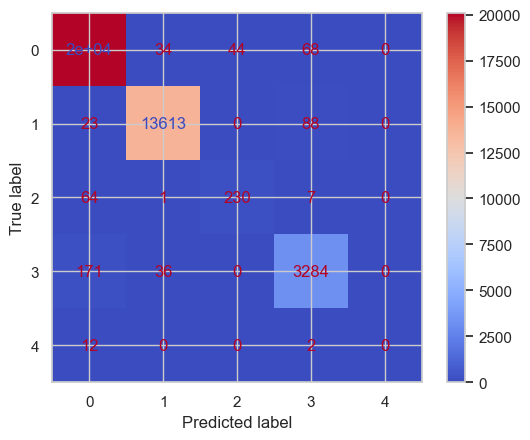

In [51]:
# visualizing the confusion matrix
disp_cm_dt_classifier = ConfusionMatrixDisplay(cm_dt_classifier)
disp_cm_dt_classifier.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_dt_classifier.png")
plt.show()

In [52]:
# precision score
precision_score_dt_classifier = precision_score(y_test, y_test_pred_dt_classifier, average = "weighted")
precision_score_dt_classifier

0.9849412377662674

In [53]:
# recall score
recall_score_dt_classifier = recall_score(y_test, y_test_pred_dt_classifier, average = "weighted")
recall_score_dt_classifier

0.9854458851548028

In [54]:
# f1 score
f1_score_dt_classifier = f1_score(y_test, y_test_pred_dt_classifier, average = "weighted")
f1_score_dt_classifier

0.985169534629255

In [55]:
# classification report
classification_report_dt_classifier = classification_report(y_test, y_test_pred_dt_classifier)
print(classification_report_dt_classifier)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20259
           1       0.99      0.99      0.99     13724
           2       0.84      0.76      0.80       302
           3       0.95      0.94      0.95      3491
           4       0.00      0.00      0.00        14

    accuracy                           0.99     37790
   macro avg       0.75      0.74      0.75     37790
weighted avg       0.98      0.99      0.99     37790



In [56]:
# bagging: random forest classifier

In [57]:
# model training
rf_classifier = RandomForestClassifier(criterion = "entropy", max_depth = 5, random_state = 96)
start_time = time.time()
rf_classifier.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_rf_classifier = end_time - start_time

In [58]:
# prediction using the training data
y_train_pred_rf_classifier = rf_classifier.predict(x_train_scaled)
y_train_pred_rf_classifier

array([0, 1, 0, ..., 1, 3, 1])

In [59]:
# prediction using the testing data
y_test_pred_rf_classifier = rf_classifier.predict(x_test_scaled)
y_test_pred_rf_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [60]:
# accuracy score of prediction using the training data
train_accuracy_rf_classifier = accuracy_score(y_train, y_train_pred_rf_classifier)
train_accuracy_rf_classifier

0.9835665842538617

In [61]:
# accuracy score of prediction using the testing data
test_accuracy_rf_classifier = accuracy_score(y_test, y_test_pred_rf_classifier)
test_accuracy_rf_classifier

0.9830907647525801

In [62]:
# confusion matrix
cm_rf_classifier = confusion_matrix(y_test, y_test_pred_rf_classifier)
cm_rf_classifier

array([[20241,     5,     0,    13,     0],
       [  134, 13589,     0,     1,     0],
       [  302,     0,     0,     0,     0],
       [  158,    12,     0,  3321,     0],
       [   14,     0,     0,     0,     0]])

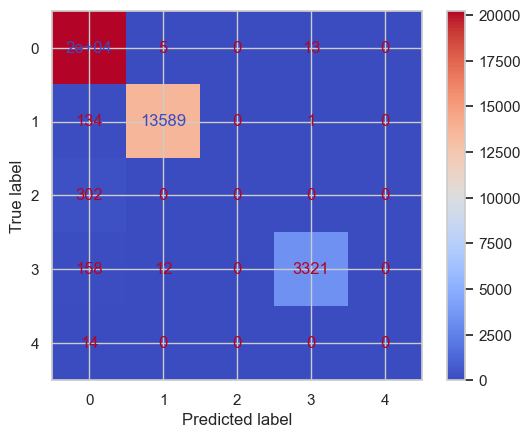

In [63]:
# visualizing the confusion matrix
disp_cm_rf_classifier = ConfusionMatrixDisplay(cm_rf_classifier)
disp_cm_rf_classifier.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_rf_classifier.png")
plt.show()

In [64]:
# precision score
precision_score_rf_classifier = precision_score(y_test, y_test_pred_rf_classifier, average = "weighted")
precision_score_rf_classifier

0.9751628291572861

In [65]:
# recall score
recall_score_rf_classifier = recall_score(y_test, y_test_pred_rf_classifier, average = "weighted")
recall_score_rf_classifier

0.9830907647525801

In [66]:
# f1 score
f1_score_rf_classifier = f1_score(y_test, y_test_pred_rf_classifier, average = "weighted")
f1_score_rf_classifier

0.978964319298147

In [67]:
# classification report
classification_report_rf_classifier = classification_report(y_test, y_test_pred_rf_classifier)
print(classification_report_rf_classifier)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20259
           1       1.00      0.99      0.99     13724
           2       0.00      0.00      0.00       302
           3       1.00      0.95      0.97      3491
           4       0.00      0.00      0.00        14

    accuracy                           0.98     37790
   macro avg       0.59      0.59      0.59     37790
weighted avg       0.98      0.98      0.98     37790



In [68]:
# boosting: gradient boosting classifier

In [69]:
# model training
gbdt_classifier = GradientBoostingClassifier(loss = "log_loss", max_depth = 5, random_state = 96)
start_time = time.time()
gbdt_classifier.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_gbdt_classifier = end_time - start_time

In [70]:
# predicting using the training data
y_train_pred_gbdt_classifier = gbdt_classifier.predict(x_train_scaled)
y_train_pred_gbdt_classifier

array([0, 1, 0, ..., 1, 3, 1])

In [71]:
# predicting using the testing data
y_test_pred_gbdt_classifier = gbdt_classifier.predict(x_test_scaled)
y_test_pred_gbdt_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [72]:
# accuracy score of prediction using the training data
train_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
train_accuracy_gbdt_classifier

0.9960571579783012

In [73]:
# accuracy score of prediction using the testing data
test_accuracy_gbdt_classifier = accuracy_score(y_test, y_test_pred_gbdt_classifier)
test_accuracy_gbdt_classifier

0.9960571579783012

In [74]:
# confusion matrix
cm_gbdt_classifier = confusion_matrix(y_test, y_test_pred_gbdt_classifier)
cm_gbdt_classifier

array([[20196,     6,     7,    36,    14],
       [    5, 13718,     0,     1,     0],
       [   16,     0,   279,     1,     6],
       [   45,     0,     3,  3441,     2],
       [    6,     0,     0,     1,     7]])

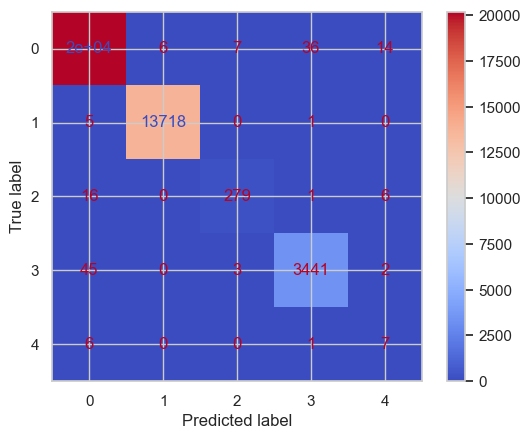

In [75]:
# visualizing the confusion matrix
disp_cm_gbdt_classifier = ConfusionMatrixDisplay(cm_gbdt_classifier)
disp_cm_gbdt_classifier.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_gbdt_classifier.png")
plt.show()

In [76]:
# precision score
precision_score_gbdt_classifier = precision_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
precision_score_gbdt_classifier

0.9963439581654923

In [77]:
# recall score
recall_score_gbdt_classifier = recall_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
recall_score_gbdt_classifier

0.9960571579783012

In [78]:
# f1 score
f1_score_gbdt_classifier = f1_score(y_test, y_test_pred_gbdt_classifier, average = "weighted")
f1_score_gbdt_classifier

0.9961799408811431

In [79]:
# classification report
classification_report_gbdt_classifier = classification_report(y_test, y_test_pred_gbdt_classifier)
print(classification_report_gbdt_classifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20259
           1       1.00      1.00      1.00     13724
           2       0.97      0.92      0.94       302
           3       0.99      0.99      0.99      3491
           4       0.24      0.50      0.33        14

    accuracy                           1.00     37790
   macro avg       0.84      0.88      0.85     37790
weighted avg       1.00      1.00      1.00     37790



In [80]:
# support vector classifier

In [81]:
# model training
sv_classifier = SVC(kernel = "poly", random_state = 96)
start_time = time.time()
sv_classifier.fit(x_train_scaled, y_train)
end_time = time.time()
training_time_sv_classifier = end_time - start_time

In [82]:
# predicting using the training data
y_train_pred_sv_classifier = sv_classifier.predict(x_train_scaled)
y_train_pred_sv_classifier

array([0, 1, 0, ..., 1, 3, 1])

In [83]:
# predicting using the testing data
y_test_pred_sv_classifier = sv_classifier.predict(x_test_scaled)
y_test_pred_sv_classifier

array([0, 0, 0, ..., 0, 1, 1])

In [84]:
# accuracy score of prediction using the training data
train_accuracy_sv_classifier = accuracy_score(y_train, y_train_pred_sv_classifier)
train_accuracy_sv_classifier

0.9851203302560846

In [85]:
# accuracy score of prediction using the testing data
test_accuracy_sv_classifier = accuracy_score(y_test, y_test_pred_sv_classifier)
test_accuracy_sv_classifier

0.9839904736702831

In [86]:
# confusion matrix
cm_sv_classifier = confusion_matrix(y_test, y_test_pred_sv_classifier)
cm_sv_classifier

array([[20116,    32,    32,    75,     4],
       [  192, 13531,     0,     1,     0],
       [   56,     0,   246,     0,     0],
       [  194,     6,     2,  3289,     0],
       [   11,     0,     0,     0,     3]])

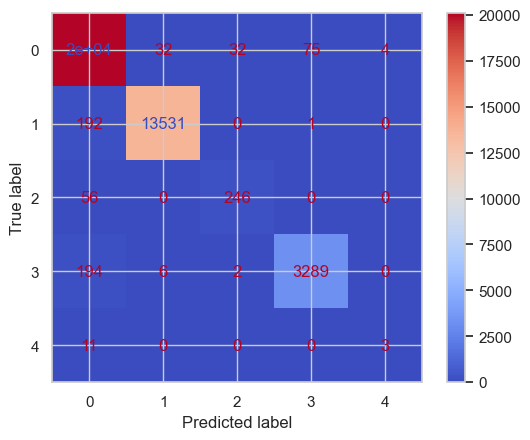

In [87]:
# visualizing the confusion matrix
disp_cm_sv_classifier = ConfusionMatrixDisplay(cm_sv_classifier)
disp_cm_sv_classifier.plot(cmap = "coolwarm")
plt.savefig("../artifacts/cm_sv_classifier.png")
plt.show()

In [88]:
# precision score
precision_score_sv_classifier = precision_score(y_test, y_test_pred_sv_classifier, average = "weighted")
precision_score_sv_classifier

0.9839078061087859

In [89]:
# recall score
recall_score_sv_classifier = recall_score(y_test, y_test_pred_sv_classifier, average = "weighted")
recall_score_sv_classifier

0.9839904736702831

In [90]:
# f1 score
f1_score_sv_classifier = f1_score(y_test, y_test_pred_sv_classifier, average = "weighted")
f1_score_sv_classifier

0.9838542244978108

In [91]:
# classification report
classification_report_sv_classifier = classification_report(y_test, y_test_pred_sv_classifier)
print(classification_report_sv_classifier)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20259
           1       1.00      0.99      0.99     13724
           2       0.88      0.81      0.85       302
           3       0.98      0.94      0.96      3491
           4       0.43      0.21      0.29        14

    accuracy                           0.98     37790
   macro avg       0.85      0.79      0.81     37790
weighted avg       0.98      0.98      0.98     37790



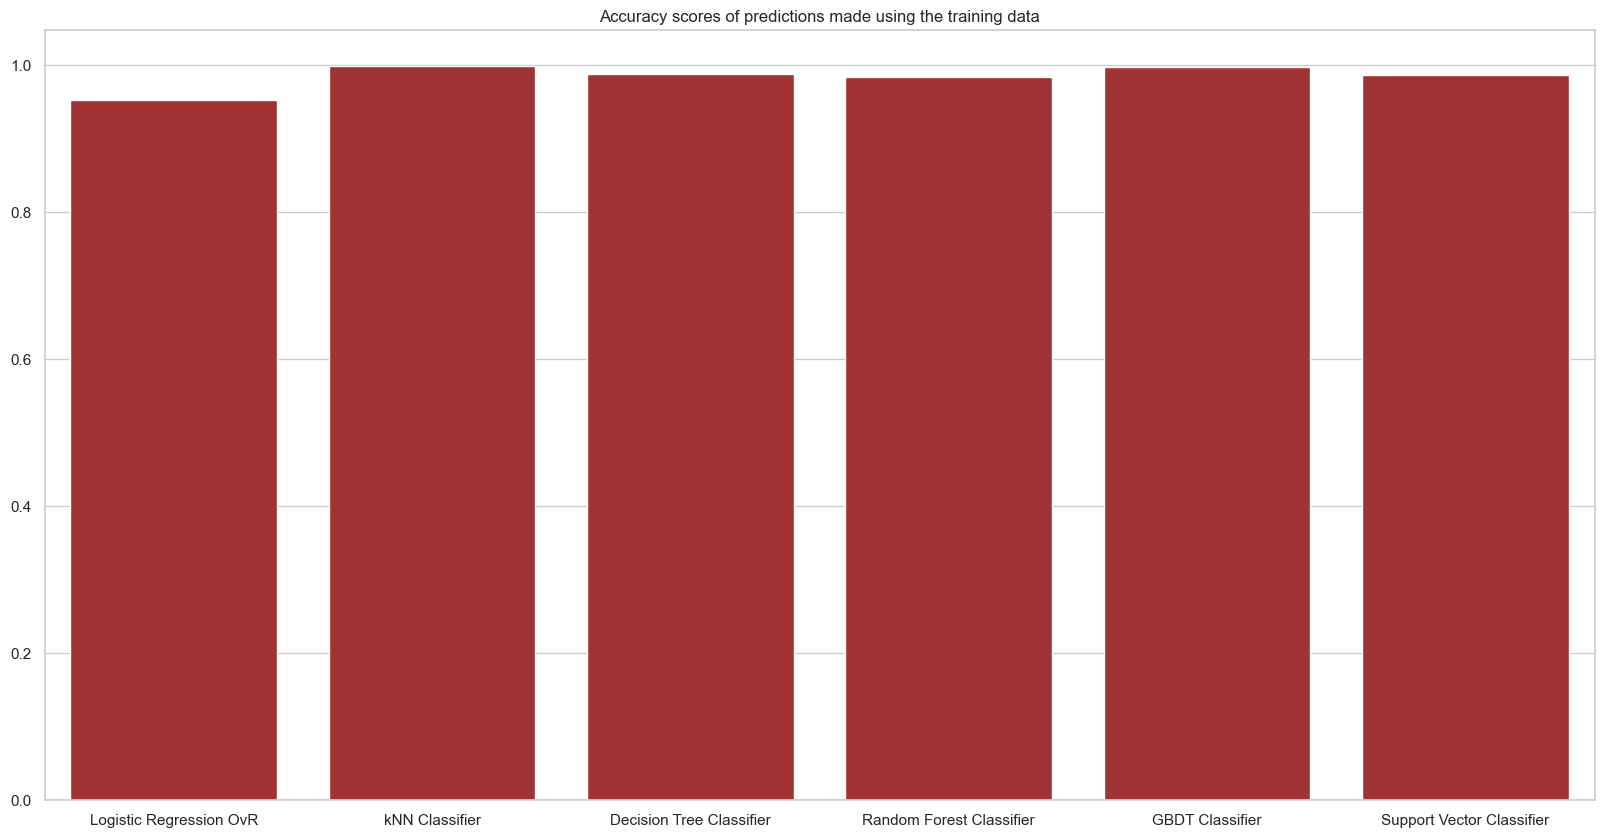

In [92]:
# comparison of accuracy scores of different models of predictions made using the training data
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    train_accuracy_log_reg_ovr,
    train_accuracy_knn_classifier,
    train_accuracy_dt_classifier,
    train_accuracy_rf_classifier,
    train_accuracy_gbdt_classifier, 
    train_accuracy_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Accuracy scores of predictions made using the training data")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_train_accuracy_scores.png")
plt.show()

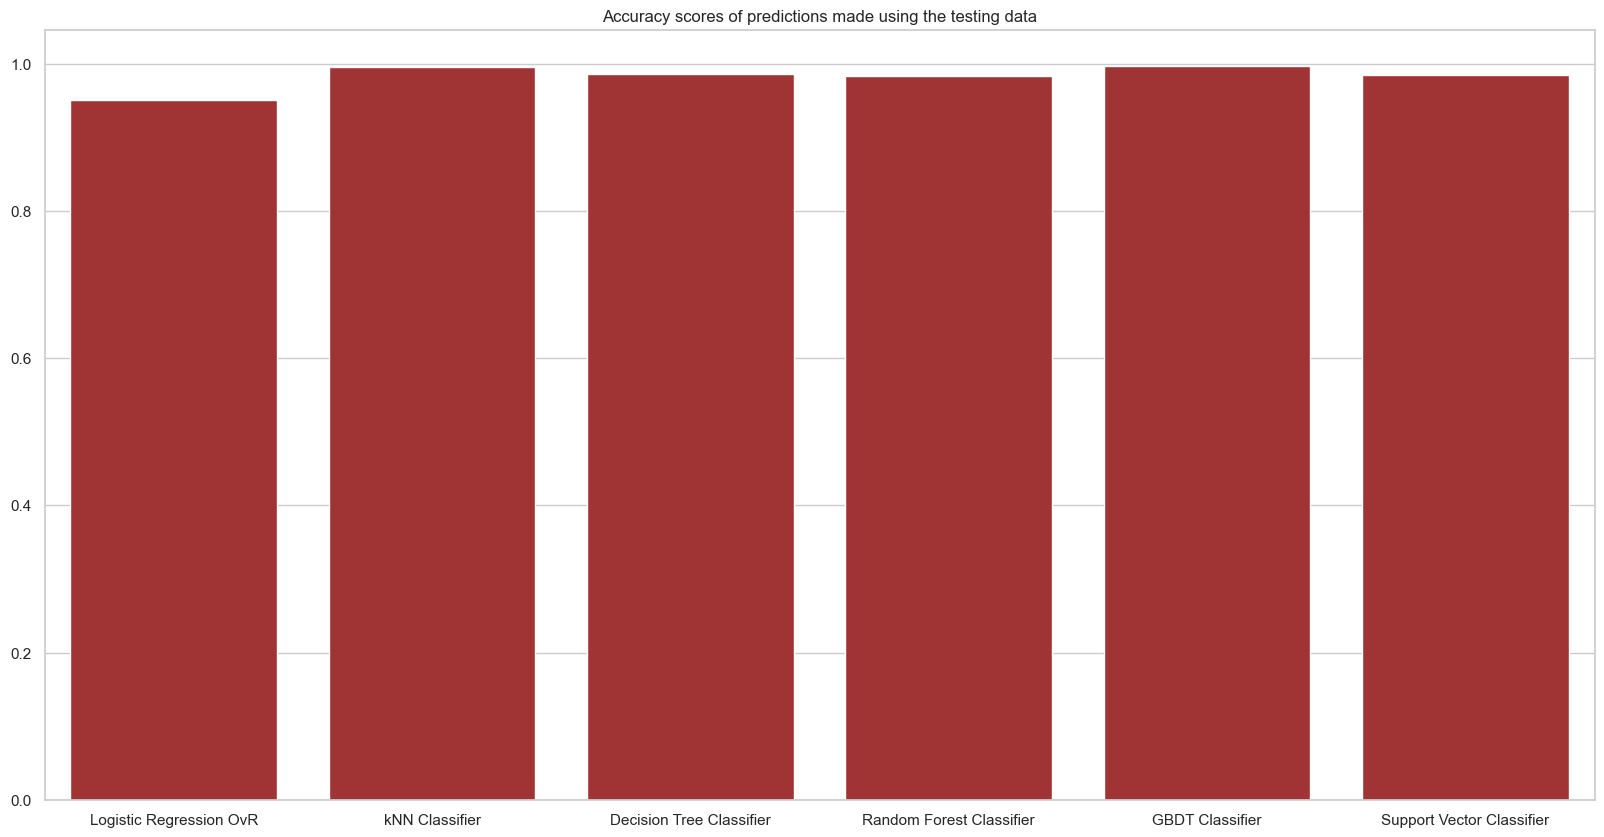

In [93]:
# comparison of accuracy scores of different models of predictions made using the testing data
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    test_accuracy_log_reg_ovr,
    test_accuracy_knn_classifier,
    test_accuracy_dt_classifier,
    test_accuracy_rf_classifier,
    test_accuracy_gbdt_classifier, 
    test_accuracy_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Accuracy scores of predictions made using the testing data")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_test_accuracy_scores.png")
plt.show()

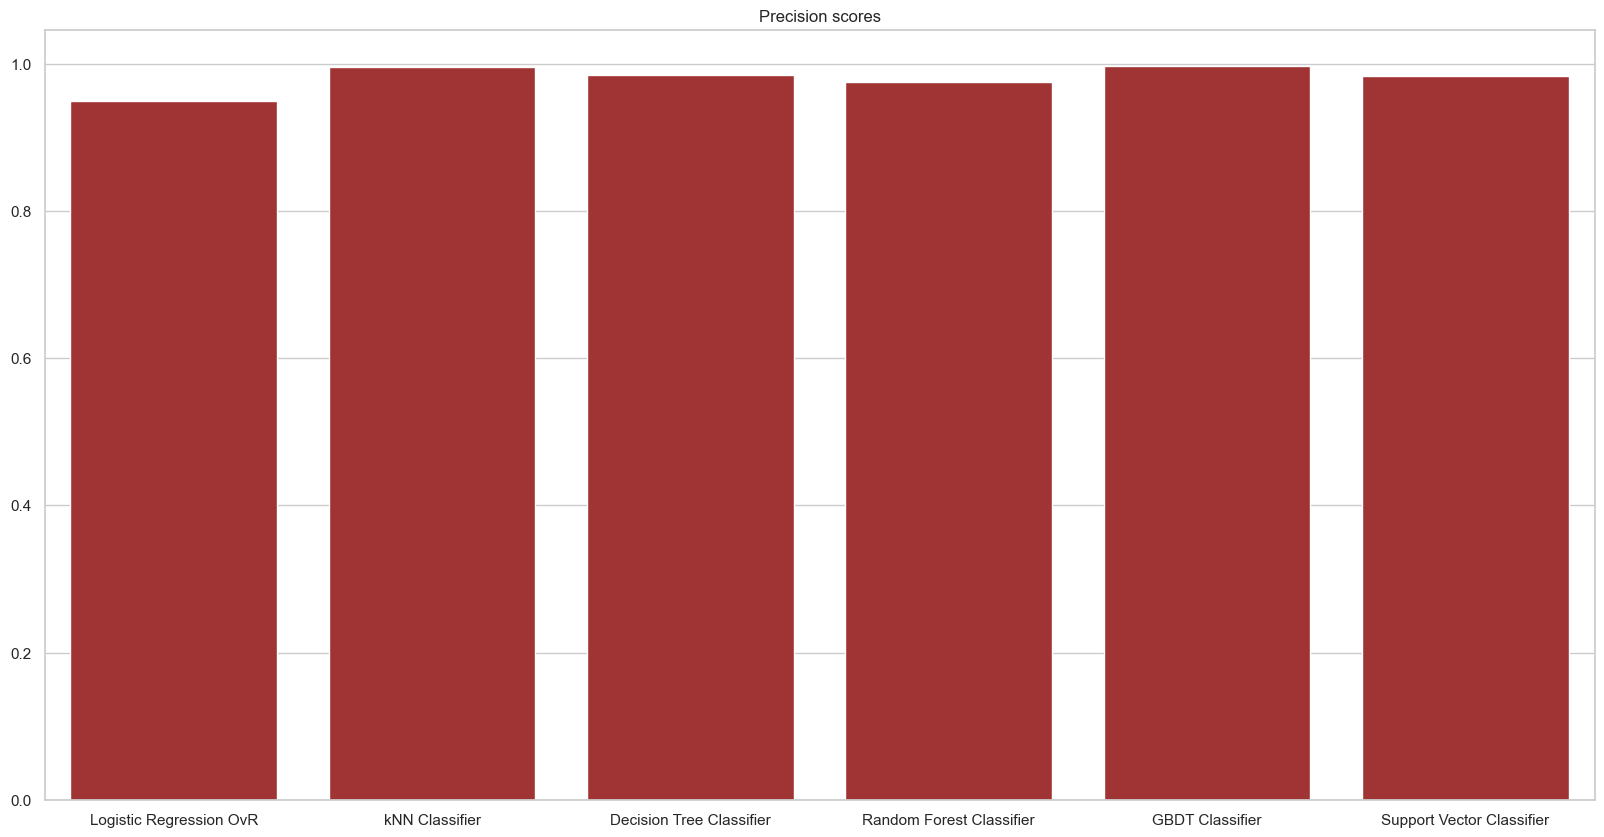

In [94]:
# comparison of precision scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    precision_score_log_reg_ovr,
    precision_score_knn_classifier,
    precision_score_dt_classifier,
    precision_score_rf_classifier,
    precision_score_gbdt_classifier, 
    precision_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Precision scores")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_precision_scores.png")
plt.show()

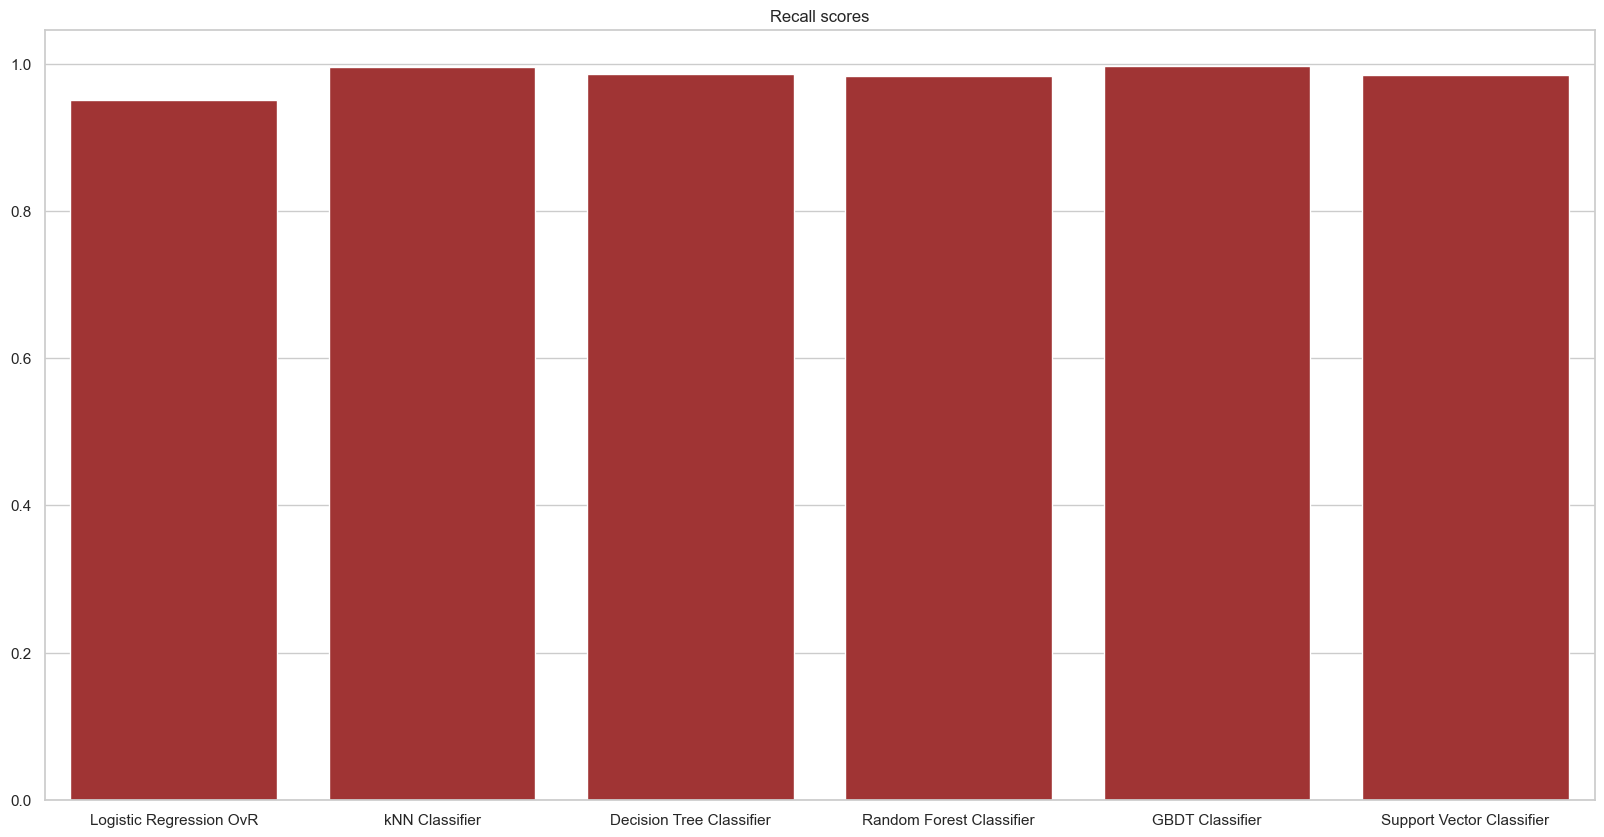

In [95]:
# comparison of recall scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    recall_score_log_reg_ovr,
    recall_score_knn_classifier,
    recall_score_dt_classifier,
    recall_score_rf_classifier,
    recall_score_gbdt_classifier, 
    recall_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Recall scores")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_recall_scores.png")
plt.show()

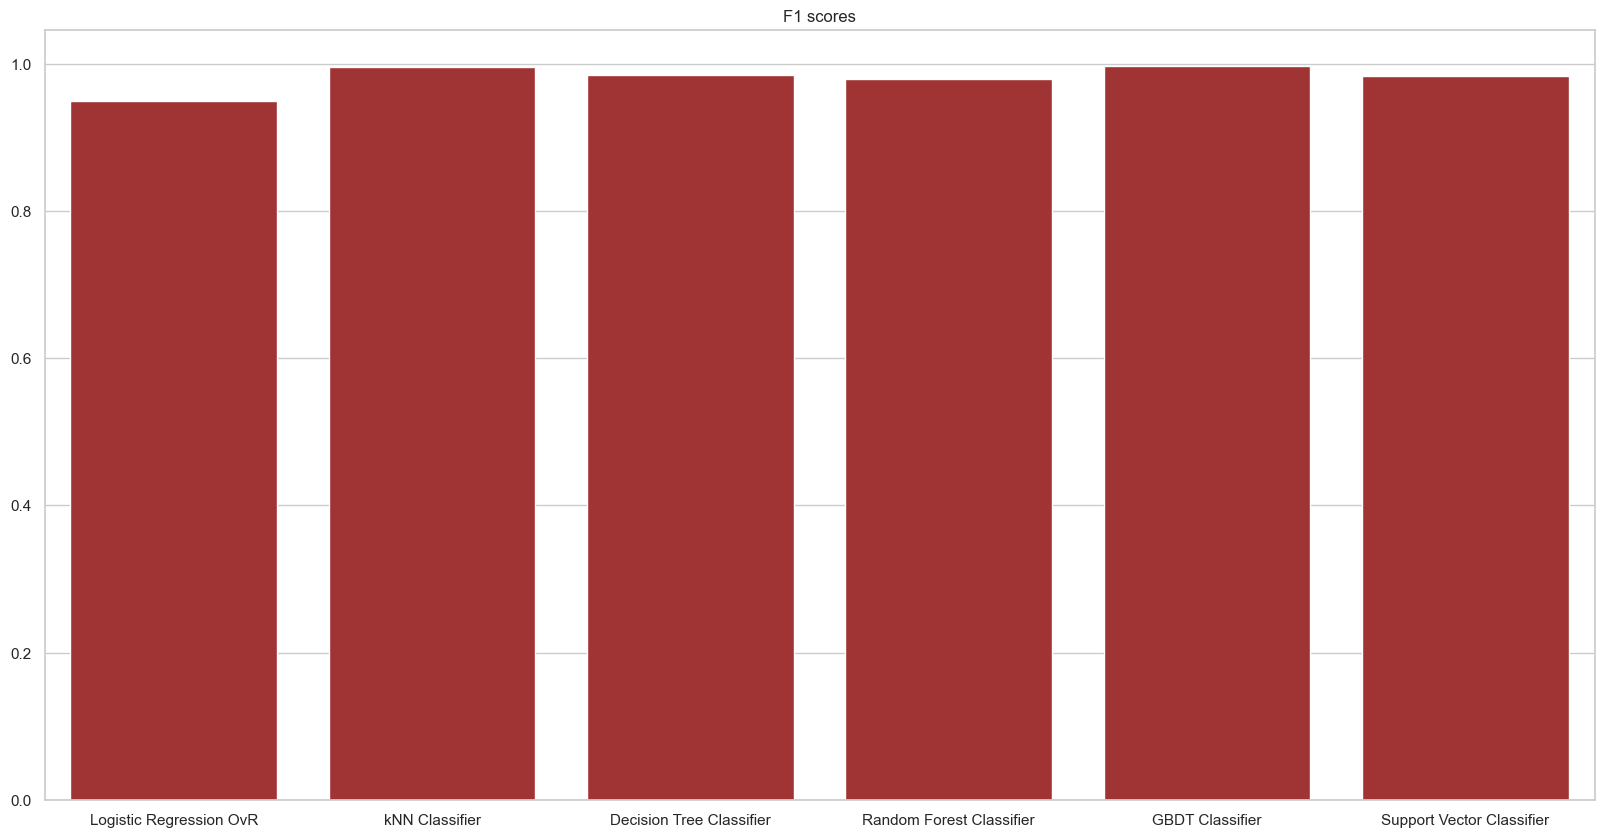

In [96]:
# comparison of f1 scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    f1_score_log_reg_ovr,
    f1_score_knn_classifier,
    f1_score_dt_classifier,
    f1_score_rf_classifier,
    f1_score_gbdt_classifier, 
    f1_score_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("F1 scores")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_f1_scores.png")
plt.show()

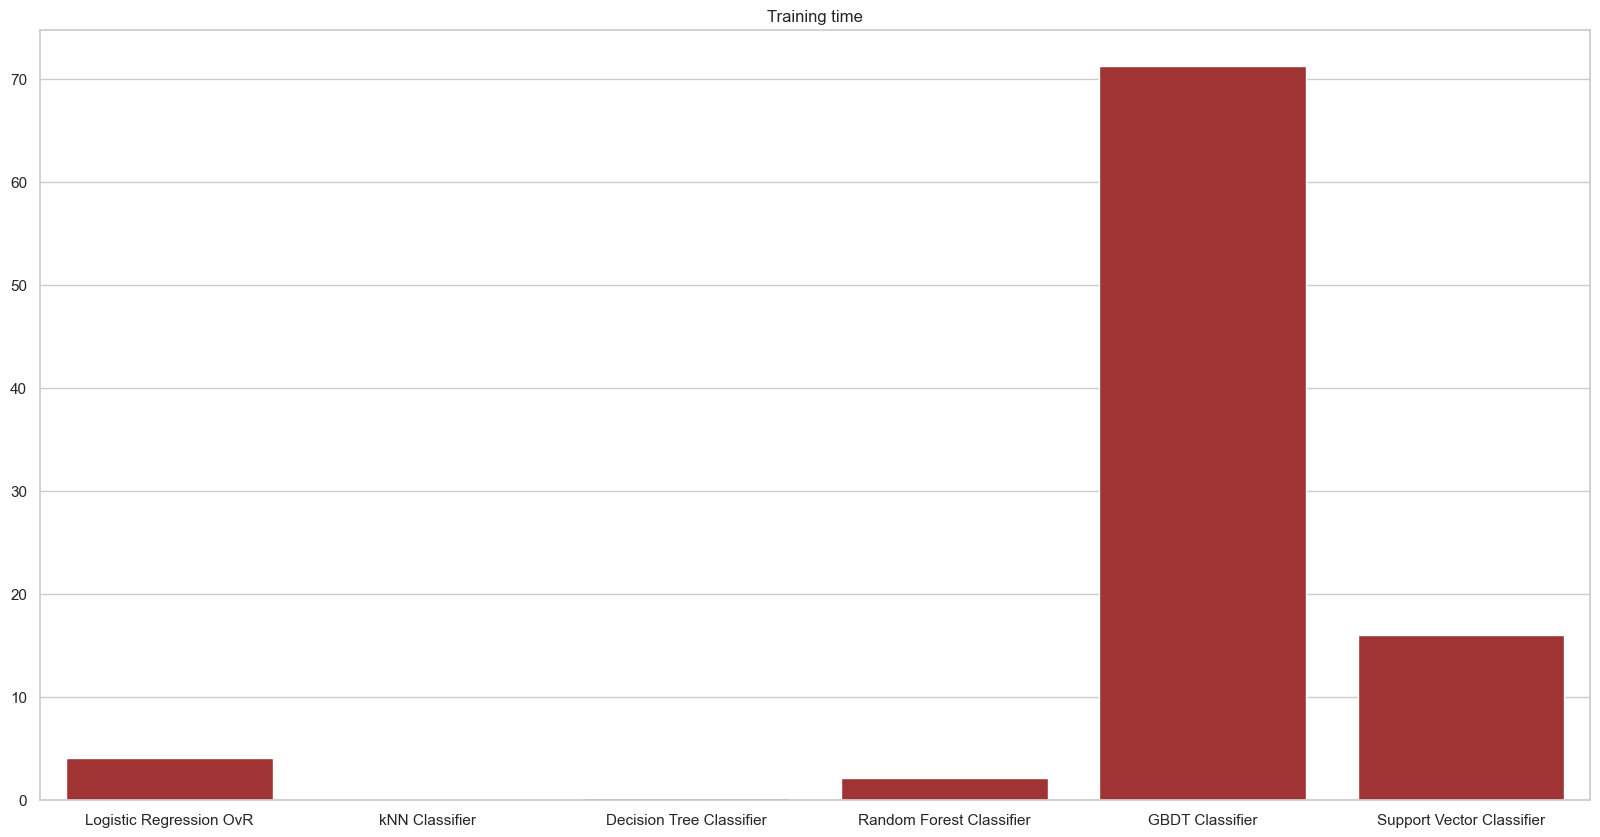

In [97]:
# comparison of f1 scores
model_names = [
    "Logistic Regression OvR",
    "kNN Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "GBDT Classifier",
    "Support Vector Classifier"
]
values = [
    training_time_log_reg_ovr,
    training_time_knn_classifier,
    training_time_dt_classifier,
    training_time_rf_classifier,
    training_time_gbdt_classifier, 
    training_time_sv_classifier
]
plt.figure(figsize = (20, 10))
plt.title("Training time")
sns.barplot(x = model_names, y = values, color = "firebrick")
plt.savefig("../artifacts/models_training_time.png")
plt.show()